In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train.head(10)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [4]:
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 6)


In [5]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
id,136950,136950,100.000000,0,int64,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
date,136950,1826,1.333333,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,136950,5,0.003651,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,136950,3,0.002191,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,136950,5,0.003651,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,136950,1028,0.750639,0,int64,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [6]:
# feature recasting, cast date as datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

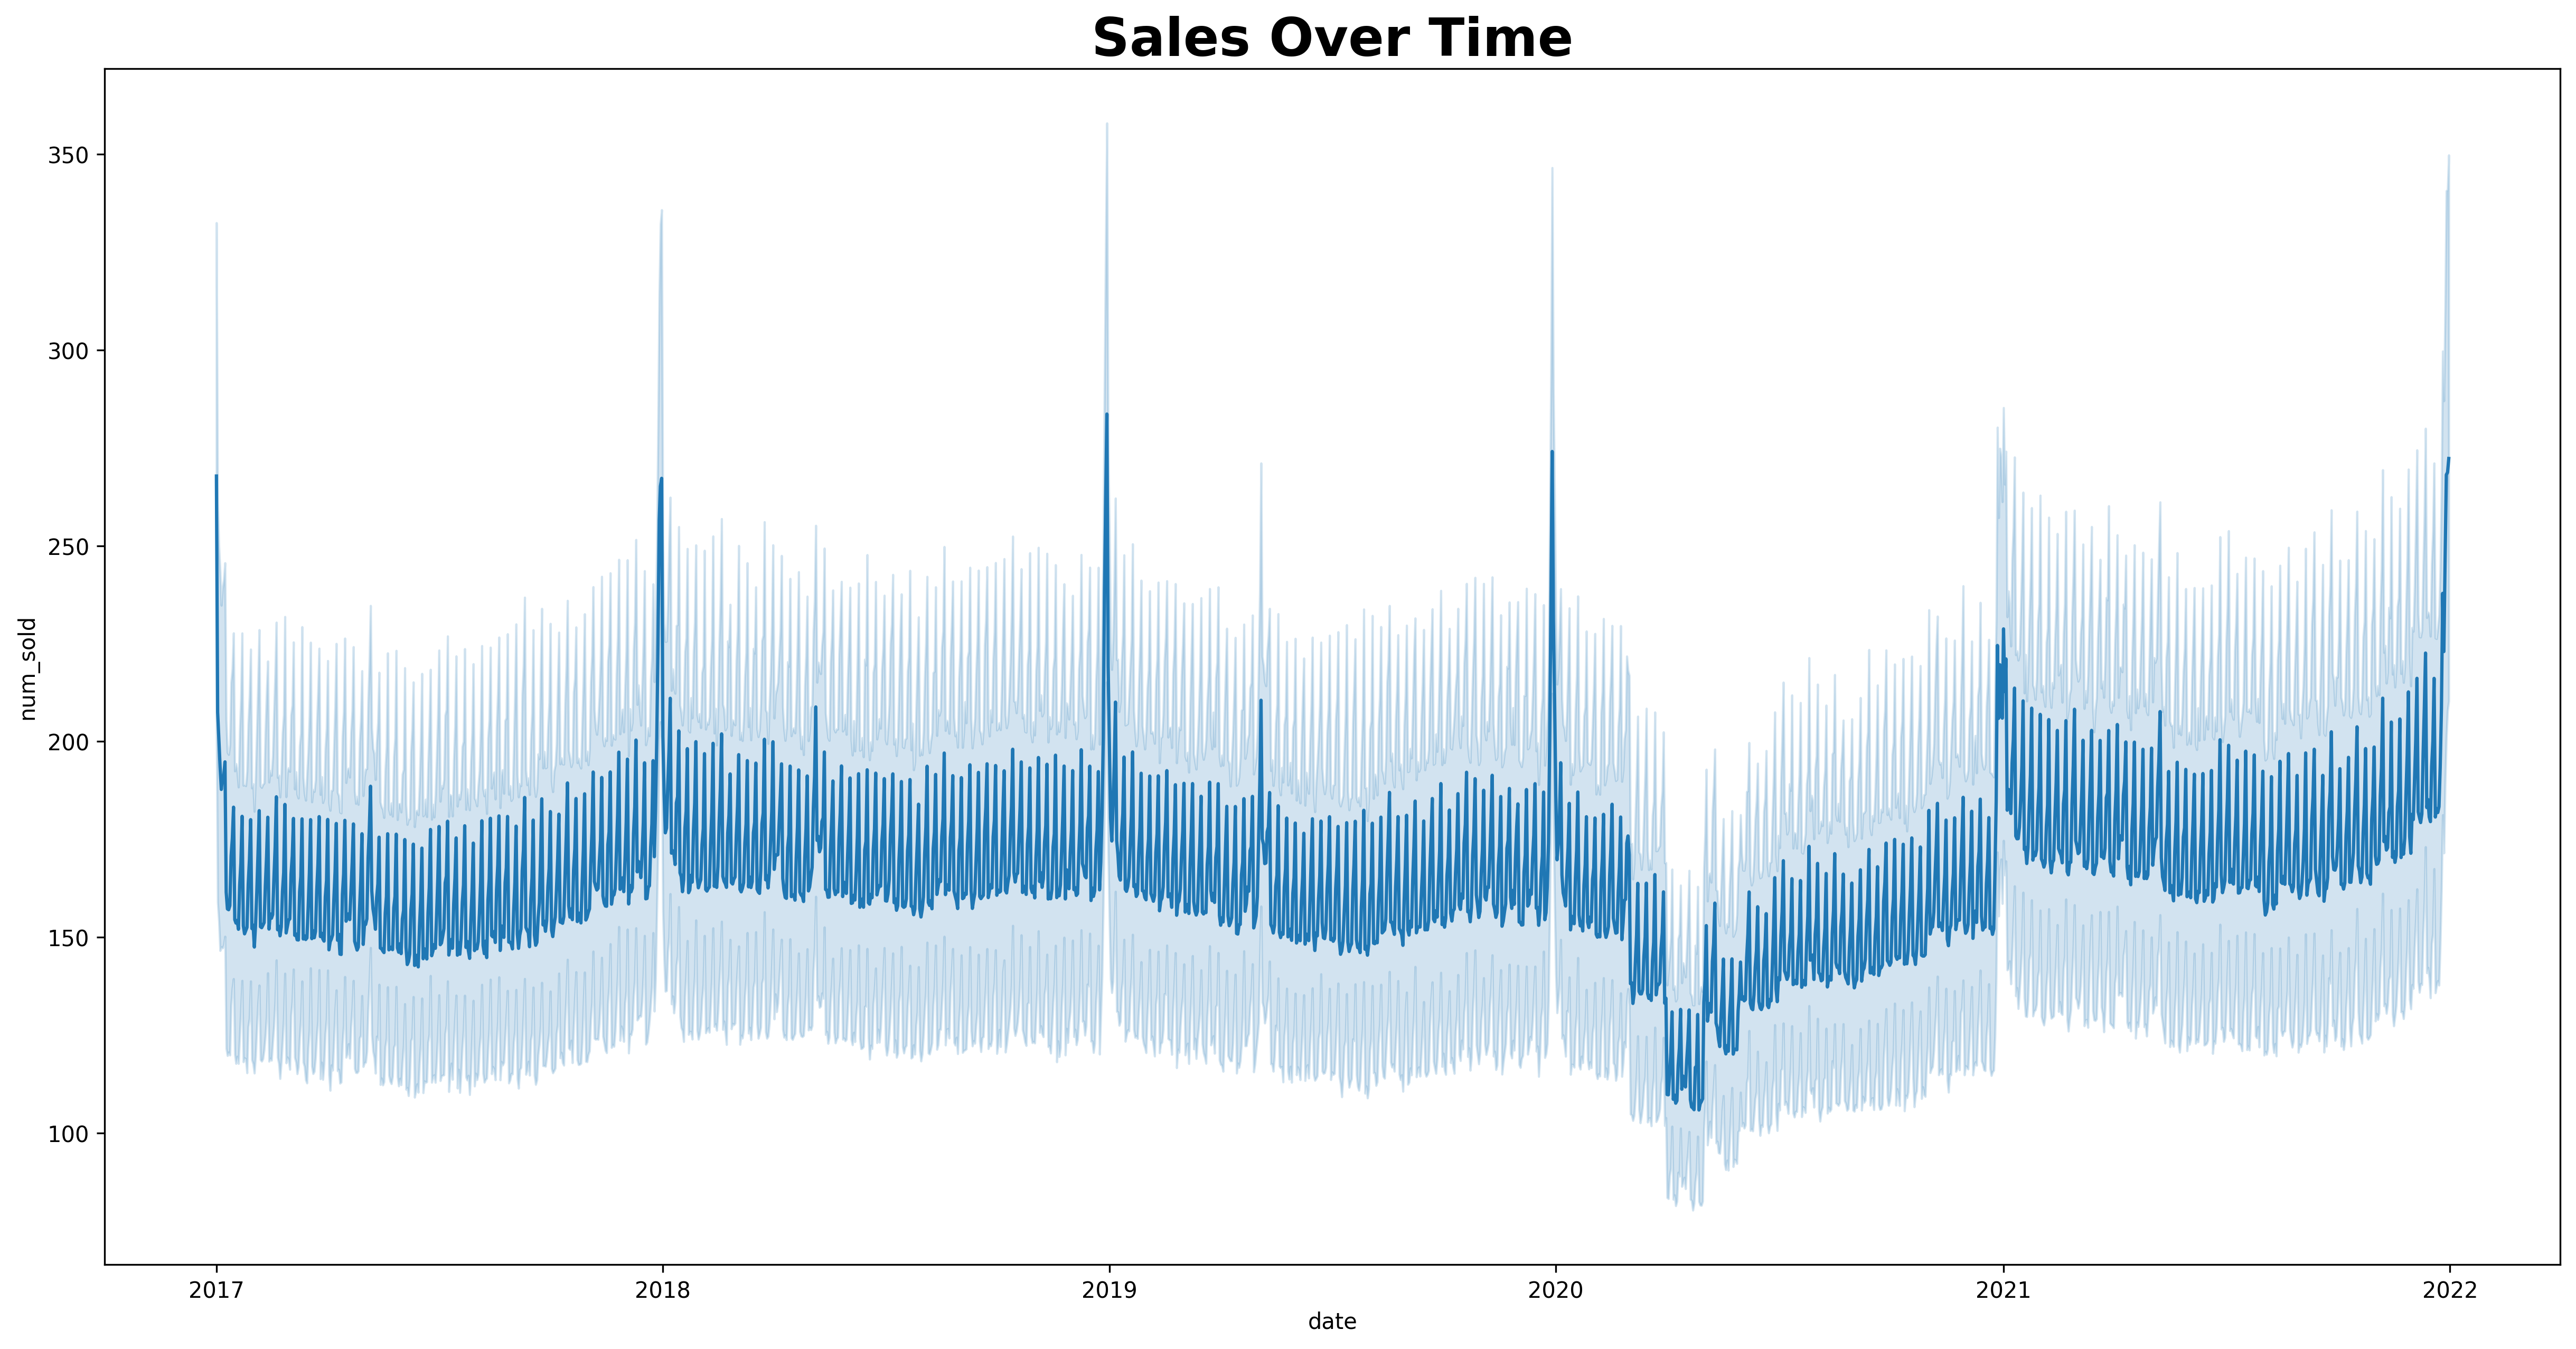

In [7]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train, x = 'date', y = 'num_sold')
    
plt.title('Sales Over Time', fontsize = 24, fontweight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train, x = 'date', y = 'num_sold', hue = 'country')
    
plt.title('Sales Over Time per Country', fontsize = 24, fontweight = 'bold')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    train['country'].value_counts(), 
    shadow = True, 
    explode = [.1 for i in range(0, 5)], 
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = train, y = 'country', ax = ax[1], palette = 'viridis', order = train['country'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Country in Train Dataset', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

In [ ]:
# Create features from 'date'
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek

# Creating moving average feature
#train['moving_average'] = train['num_sold'].rolling(window=5).mean()

# Fill NA values caused by moving average
train = train.fillna(method='bfill')

# One-hot encoding
train = pd.get_dummies(train, columns=['country', 'store', 'product'])

# Define features X and target y
X = train.drop(['id', 'date', 'num_sold'], axis=1)
y = train[['num_sold']]

y_train = train[['num_sold']]
X_train = train.drop(['id','num_sold', 'date'], axis=1)


### Do same for test data set
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek

# Fill NA values caused by moving average
test = test.fillna(method='bfill')

# One-hot encoding
test = pd.get_dummies(test, columns=['country', 'store', 'product'])

ids = test['id']
test = test.drop(['id', 'date'], axis=1)

X_train.head(10)

In [ ]:
test.head(10)

In [ ]:
from xgboost import XGBRegressor
from sklearn.multioutput import RegressorChain

# YOUR CODE HERE
model = RegressorChain(base_estimator=XGBRegressor())

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(test)

In [ ]:
y_pred

In [ ]:
submit = pd.DataFrame(y_pred, columns = ['num_sold'])

submit['id'] = ids
submit = submit[['id','num_sold']]

submit.head()

In [ ]:
submit.to_csv('submission.csv', index=False)